# Instructor Do: Decision Trees

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image


## Loading and Preprocessing Loans Encoded Data

In [2]:
# Loading data
file_path = Path("../Resources/loans_data_encoded.csv")
df_loans = pd.read_csv(file_path)
df_loans.head()



,amount,term,age,bad,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,0,6,0,1,0,0,0,1
1,1000,30,50,0,7,1,0,0,0,1,0
2,1000,30,33,0,8,1,0,0,0,1,0
3,1000,15,27,0,9,0,0,0,1,0,1
4,1000,30,28,0,10,0,0,0,1,1,0


In [3]:
# Define features set
X = df_loans.copy()
X.drop("bad", axis=1, inplace=True)
X.head()



,amount,term,age,month_num,education_Bachelor,education_High School or Below,education_Master or Above,education_college,gender_female,gender_male
0,1000,30,45,6,0,1,0,0,0,1
1,1000,30,50,7,1,0,0,0,1,0
2,1000,30,33,8,1,0,0,0,1,0
3,1000,15,27,9,0,0,0,1,0,1
4,1000,30,28,10,0,0,0,1,1,0


In [4]:
# Define target vector
y = df_loans["bad"].values.reshape(-1, 1)
y[:5]



array([[0],
       [0],
       [0],
       [0],
       [0]])

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)



In [6]:
# Creating StandardScaler instance
scaler = StandardScaler()



In [7]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)



In [8]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)


## Fitting the Decision Tree Model

In [23]:
# Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier(max_depth = 3)



In [24]:
# Fitting the model
model = model.fit(X_train_scaled, y_train)



## Making Predictions Using the Tree Model

In [25]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)



## Model Evaluation

In [26]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)



In [27]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,68,16
Actual 1,27,14


Accuracy Score : 0.656
Classification Report
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        84
           1       0.47      0.34      0.39        41

    accuracy                           0.66       125
   macro avg       0.59      0.58      0.58       125
weighted avg       0.63      0.66      0.64       125



## Visualizing the Decision Tree

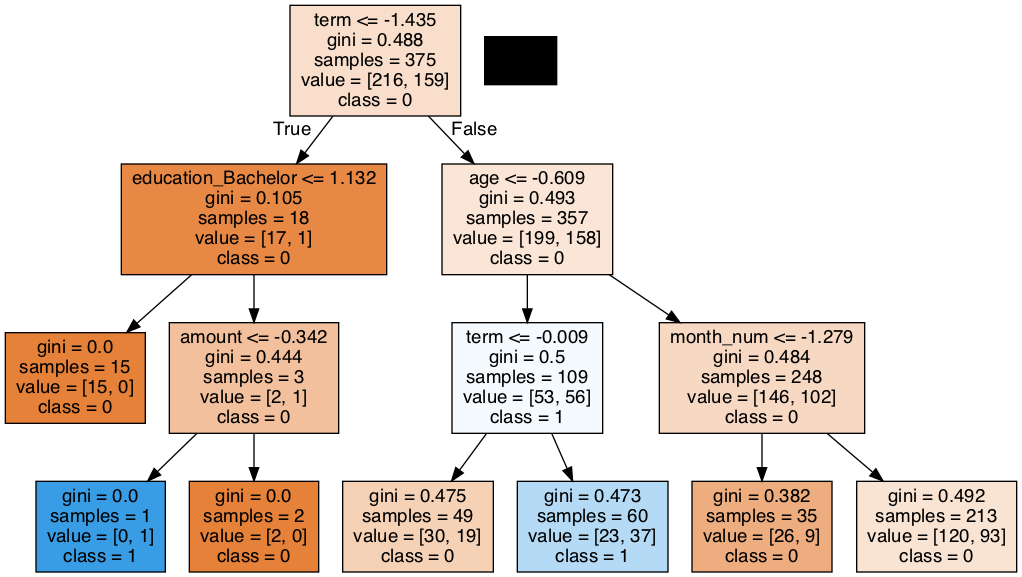

In [28]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())



In [29]:
# Saving the tree as PDF
file_path = ("../Resources/loans_tree.pdf")
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = ("../Resources/loans_tree.png")
graph.write_png(file_path)


True